In [23]:
r"""
The code below was produced out of an assignment assigned to me for the Introduction to 
Machine Learning: Supervised Learning course at the University of Colorado Boulder hosted 
by Coursera. The purpose of the assignment was to train and test a simple linear regression 
model to predict house sale prices for Kings County using a dataset that can be downloaded
from https://www.kaggle.com/harlfoxem/housesalesprediction/download. Additional information
for the dataset can be found in https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/.
"""
__author__ = 'Axel V. Morales Sanchez'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set color map to have light blue background
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline


In [24]:
r"""
In the code block below, I read and modify the dataset. Specifically, I create new 
'sales_year' and 'sales_month' columns that are self explanatory, and drop some 
uneccesary variables 'id', 'date', and 'zipcode'. I then visually analyze the correlation 
of different features with the target 'price' and themselves using sns.heatmap and 
sns.pairplot plots, as well as extracting the feature that has the maximum correlation 
with the target into the variable 'best_guess_predictor'. 
"""
df2 = pd.read_csv('kc_house_data.csv')
df2['sales_year'] = df2.date.apply(lambda x: int(x[:4]))
df2['sales_month'] = df2.date.apply(lambda x: int(x[4:6]))
df2 = df2.drop(['id', 'date', 'zipcode'], axis = 1)
corr = df2.corr()
max_corr = max(corr['price'][1:])
best_guess_predictor = corr['price'][corr['price'] == max_corr].index[0]

<AxesSubplot:>

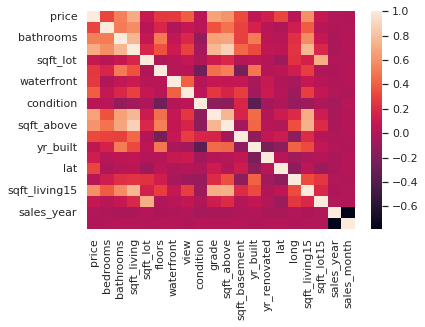

In [25]:
sns.heatmap(corr)

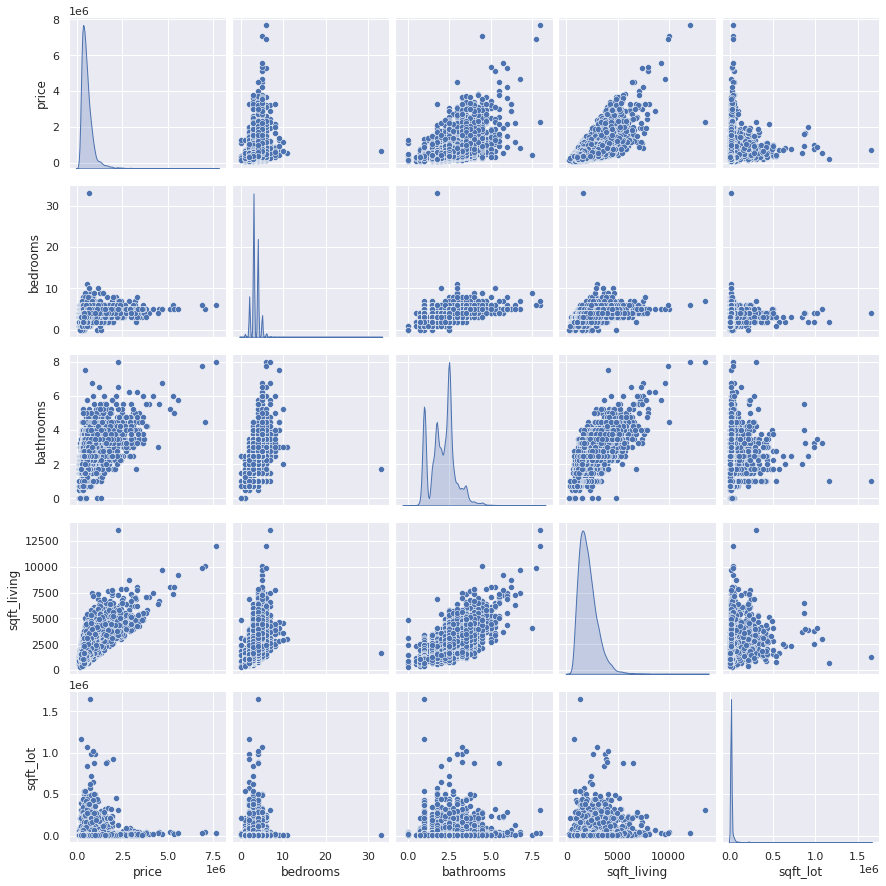

In [26]:
sns.pairplot(data = df2, vars = df2.columns[:5], diag_kind = "kde")

In [27]:
r"""
In the code block below, I split the dataset into a training and testing dataset,
to which I fit an OLS model on the training dataset using 'best_guess_predictor'. 
"""
X_train, X_test = train_test_split(df2, test_size = 0.2)
model = smf.ols(formula = 'price ~ ' + best_guess_predictor, data = X_train)
result = model.fit()
summary = result.summary()

In [28]:
r"""
Below I fit a model on the training dataset for each feature and extract the
fitted R-squared of each model. I then insert the top three features based on
the highest R-squared into a list 'top_three'.
"""
rsquared_dict = {}
for column in df2.columns[1:]:
    model = smf.ols(formula = 'price ~ ' + column, data = X_train)
    rsquared_dict[model.fit().rsquared_adj] = column
top_rsquared = sorted(list(rsquared_dict.keys()))[-3:][::-1]
top_three = [rsquared_dict[rsquare] for i, rsquare in enumerate(top_rsquared)]

In [29]:
def prediction_plot(target: str, 
               feature: str, 
               train_data: pd.DataFrame, 
               test_data: pd.DataFrame):
  r"""
  Creates a plot overlaying predicted values from a training OLS linear regression model
  on test data, with a comparison of the training model MSE and predicted values MSE.

  :param target: a string of the target name
  :param feature: a string of the feature name
  :param train_data: a training dataset
  :param test_data: a testing dataset
  :return a matplotlib.plt object displaying test data values overlayed by predicted values
          with a comparison of the training and predicted MSE. 
  """
  formula = target + ' ~ ' + feature
  model = smf.ols(formula = formula, data = train_data)
  result = model.fit()
  mse_train = result.mse_resid
  x_test = test_data[feature]
  y_test = np.array(test_data[target])
  y_pred = np.array(result.predict(x_test))
  mse_test = (1 / len(y_test)) * sum(np.square(y_test - y_pred))
  fig = plt.scatter(x_test, y_test, label = 'Test Data')
  plt.plot(x_test, y_pred, c = 'r', label = 'OLS Prediction')
  plt.plot([], [], ' ', label = 'MSE Test: ' + "{:e}".format(mse_test))
  plt.plot([], [], ' ', label = 'MSE Train: ' + "{:e}".format(mse_train))
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.legend(loc = 'best')
  return(fig)

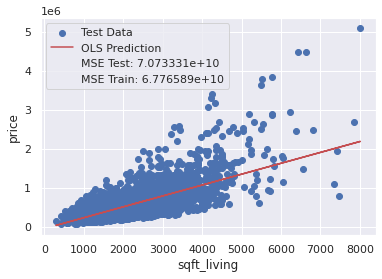

In [30]:
prediction_plot('price', top_three[0], X_train, X_test)

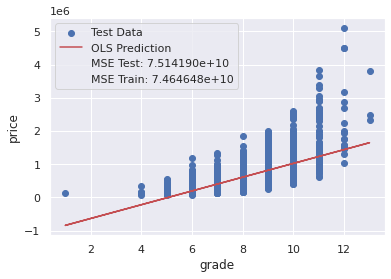

In [31]:
prediction_plot('price', top_three[1], X_train, X_test)

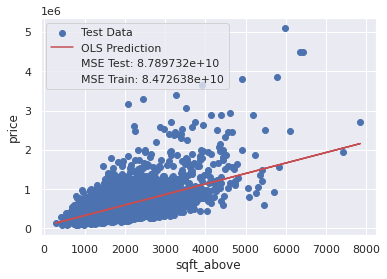

In [32]:
prediction_plot('price', top_three[2], X_train, X_test)